# PeMS_data

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
# tf.enable_eager_execution()

C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\irfan\anaconda3\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
PeMS_data = pd.read_pickle('PeMS_dataset.pkl')
PeMS_data.sort_values('TOD')

,Date,TOD,Travel Time,# Lane Pts,start,end,distance
0,2020-01-10,00:00,3.38,37,SR 78,Centre City Pkwy,6.28
209369,2020-06-29,00:00,16.42,144,405-N/Sepulveda Blvd,405-N/Onion Ave,30.58
186047,2020-06-12,00:00,16.47,144,405-N/Sepulveda Blvd,405-N/Onion Ave,30.58
195554,2020-06-19,00:00,3.38,37,SR 78,Centre City Pkwy,6.28
195547,2020-06-19,00:00,16.58,144,405-N/Sepulveda Blvd,405-N/Onion Ave,30.58
...,...,...,...,...,...,...,...
183545,2020-06-11,23:55,19.70,231,405-N/Wardlow Rd,405-N/National Blvd,35.89
13049,2020-01-22,23:55,19.57,232,405-N/Wardlow Rd,405-N/National Blvd,35.89
47060,2020-02-21,23:55,16.77,144,405-N/Sepulveda Blvd,405-N/Onion Ave,30.58
43009,2020-02-18,23:55,21.15,248,405-N/Wardlow Rd,405-N/State Hwy 2,39.12


In [3]:
PeMS_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Travel Time,211392.0,30.062288,23.704173,3.05,18.13,23.07,40.10,163.37
# Lane Pts,211392.0,260.333428,179.409164,24.00,144.00,249.00,320.00,1139.00
distance,211392.0,45.888828,35.494263,6.28,30.58,39.12,58.74,215.97


In [4]:
from sklearn.preprocessing import LabelEncoder

def data_preprocessing(data):

    labelencoder = LabelEncoder()

    data['LanePts'] = labelencoder.fit_transform(data['# Lane Pts'])
    data['start'] = labelencoder.fit_transform(data['start'])
    data['end'] = labelencoder.fit_transform(data['end'])

    data['Timestamp'] = data['Date'].dt.strftime('%Y-%m-%d').astype('str') +' '+ data['TOD'].astype('str')
    data['Timestamp'] = data['Timestamp'].astype(np.datetime64)

    data = data.sort_values('Timestamp').reset_index(drop=True)

    data['dept_hour'] = data['Timestamp'].dt.hour
    data['dept_minute'] = data['Timestamp'].dt.minute
    data['dept_dayofweek'] = data['Timestamp'].dt.dayofweek
    data['dept_monthofyear'] = data['Timestamp'].dt.month 

    data = data.drop(['Date','TOD','Timestamp','# Lane Pts'],1)
    
    return data

In [5]:
data = data_preprocessing(PeMS_data)

In [6]:
data

,Travel Time,start,end,distance,LanePts,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear
0,3.38,5,5,6.28,3,0,0,4,1
1,42.95,4,6,77.90,199,0,0,4,1
2,20.00,2,2,35.89,77,0,0,4,1
3,16.48,1,3,30.58,23,0,0,4,1
4,21.83,2,4,39.12,95,0,0,4,1
...,...,...,...,...,...,...,...,...,...
211387,16.48,1,3,30.58,24,23,55,1,6
211388,19.82,2,2,35.89,78,23,55,1,6
211389,3.37,5,5,6.28,3,23,55,1,6
211390,42.82,4,6,77.90,201,23,55,1,6


In [8]:
train_data = data[data.dept_monthofyear < 6]
test_data = data[data.dept_monthofyear == 6]

In [49]:
train_data

,Travel Time,start,end,distance,LanePts,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear
0,3.38,5,5,6.28,3,0,0,4,1
1,42.95,4,6,77.90,199,0,0,4,1
2,20.00,2,2,35.89,77,0,0,4,1
3,16.48,1,3,30.58,23,0,0,4,1
4,21.83,2,4,39.12,95,0,0,4,1
...,...,...,...,...,...,...,...,...,...
167899,19.90,2,2,35.89,77,23,55,4,5
167900,32.02,0,1,58.74,143,23,55,4,5
167901,43.45,4,6,77.90,201,23,55,4,5
167902,3.55,5,5,6.28,3,23,55,4,5


In [9]:
train_x, train_y = train_data.drop(['Travel Time'],1), train_data['Travel Time']

In [2]:
import pickle

with open('PeMS_data/train_x.pkl','rb') as f:
    train_x = pickle.load(f)

with open('PeMS_data/train_y.pkl','rb') as f:
    train_y = pickle.load(f)

with open('PeMS_data/test_x.pkl','rb') as f:
    test_x = pickle.load(f)

with open('PeMS_data/test_y.pkl','rb') as f:
    test_y = pickle.load(f)

In [2]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7],
    'n_estimators': [50,100,200,300,400,500],
    'max_depth': range(2, 12)
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=gbm_param_grid, estimator=gbm, 
                        scoring='neg_mean_squared_error', cv=2, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(train_x, train_y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

<IPython.core.display.Javascript object>

Fitting 2 folds for each of 2400 candidates, totalling 4800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4800 out of 4800 | elapsed: 390.5min finished


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 300}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Lowest RMSE found:  0.6367690424832584


In [3]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn import model_selection, preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

#Fitting XGB regressor 
model = xgb.XGBRegressor(objective= 'reg:linear', eval_metric= 'rmse',
                         colsample_bytree = 0.7, learning_rate = 0.1, max_depth = 9, n_estimators = 300)
model.fit(train_x,train_y)
print (model)

[18:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:36:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=9, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)


In [3]:
import pickle

file_name = "xgb_reg_pems.pkl"

# save
# pickle.dump(model, open(file_name, "wb"))

# load
xgb_model_loaded = pickle.load(open(file_name, "rb"))

[12:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [36]:
test_x, test_y = test_data.drop(['Travel Time'],1), test_data['Travel Time']

In [4]:
# Evaluate Model

from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [5]:
evaluate(xgb_model_loaded, test_x, test_y)

Model Performance
MAE: 0.3949 minutes.
RMSE: 0.61.
R2: 1.00.
Accuracy = 98.48%.


98.48486691889951

In [39]:
predictions = xgb_model_loaded.predict(test_x)

In [40]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = predictions
pre_ac['travels'] = [l for l in range(0,len(predictions))]

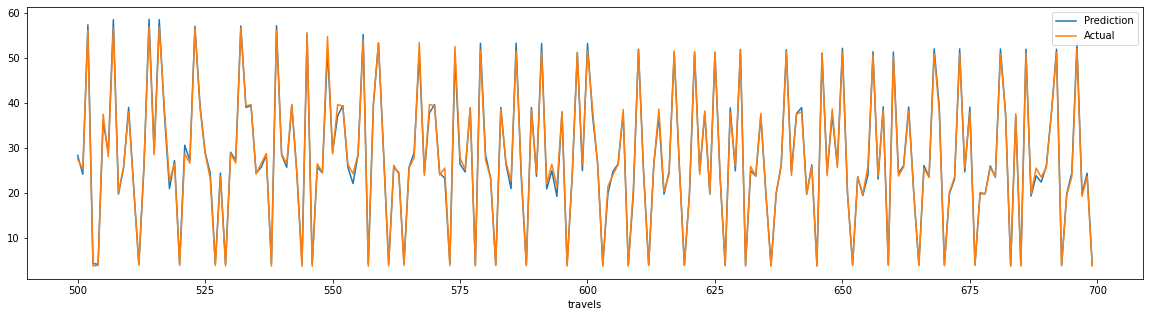

In [41]:
import matplotlib.pyplot as plt

##### plot according to time of day

pre_ac[500:700].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

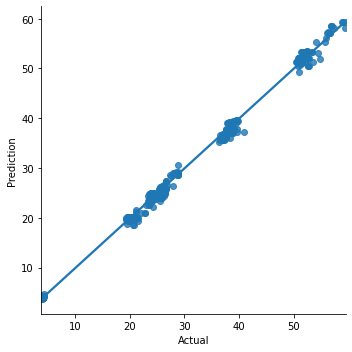

In [42]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac[500:1000]);

In [7]:
import shap
 
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(xgb_model_loaded)
shap_values = explainer.shap_values(test_x)

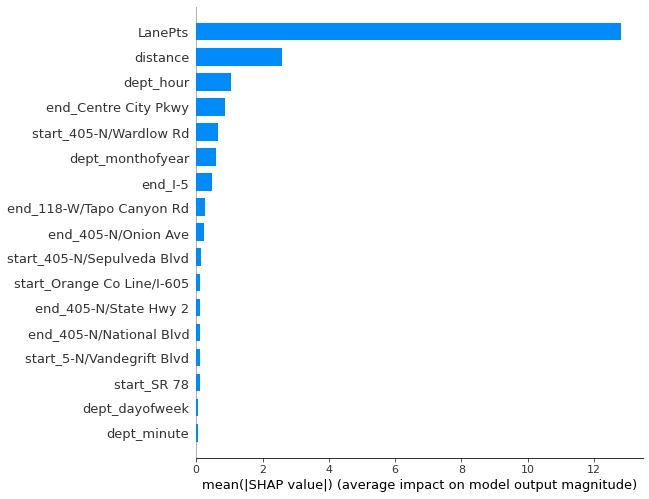

In [8]:
shap.summary_plot(shap_values, train_x, feature_names = test_x.columns, plot_type="bar")

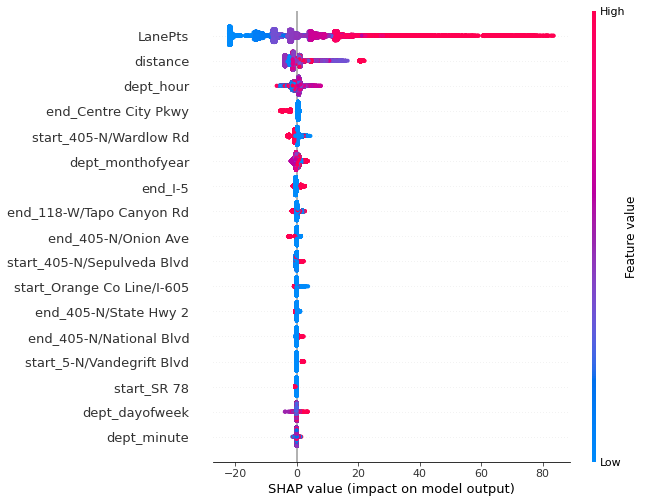

In [9]:
import matplotlib.pyplot as plt

f = plt.figure()
shap.summary_plot(shap_values, test_x, feature_names = test_x.columns)

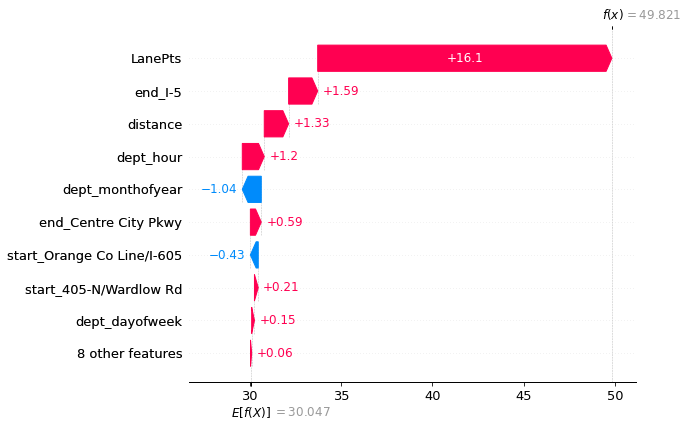

In [10]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''
shap.initjs()

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [11]:
# visualize the first prediction's explanation with a force plot
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [12]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0:1000], feature_names = test_x.columns, show = True)

# LIME

In [6]:
import lime
import lime.lime_tabular

In [7]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_x.values, feature_names=train_x.columns, verbose=True, mode='regression')
explanation = explainer.explain_instance(test_x.iloc[0].values, xgb_model_loaded.predict, num_features=10)

Intercept 33.89364850987994
Prediction_local [73.54630216]
Right: 49.821377


In [8]:
explanation.show_in_notebook(show_table=True, show_all=False)